## 0.2 Data Exploration

In [1]:
%load_ext autoreload
%autoreload 2

### Libraries

In [2]:
import final_project.utils.paths as path
import janitor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import final_project.visualization.visualize as visualize

### Explore Data

#### Read Data

In [3]:
processed_covid_file = path.data_processed_dir("time_series_covid19_confirmed_global_processed.csv")

In [4]:
processed_covid_df = pd.read_csv(processed_covid_file)
processed_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223508 entries, 0 to 223507
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   country_region  223508 non-null  object
 1   date            223508 non-null  object
 2   value           223508 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [5]:
processed_covid_df.head()

,country_region,date,value
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0
2,Algeria,2020-01-22,0
3,Andorra,2020-01-22,0
4,Angola,2020-01-22,0


In [6]:
sns.set_style("whitegrid")

In [7]:
processed_covid_df = (
    processed_covid_df
    .transform_column(
        "date",
        pd.to_datetime
    )
)

##### Appearance of new covid-19 cases in latam
Subset data

In [8]:
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru']
some_latam_countries_df = processed_covid_df.filter_on(f"country_region in {countries}")
some_latam_countries_df.head(3)

,country_region,date,value
7,Argentina,2020-01-22,0
31,Brazil,2020-01-22,0
58,Chile,2020-01-22,0


### Ploting and visualizing data

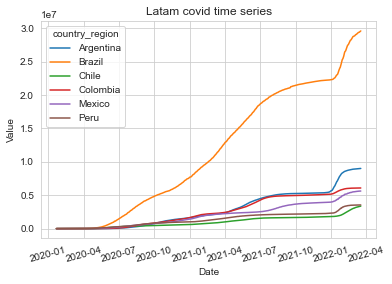

In [9]:
visualize.covid_time_series(some_latam_countries_df)

In [10]:
visualize.top_countries(processed_covid_df, countries,11)

,country_region,value,color
0,US,20638223520,lightblue
1,India,13433651494,lightblue
2,Brazil,9122588695,red
3,France,3833859189,lightblue
4,United Kingdom,3759253406,lightblue
5,Russia,3545189470,lightblue
6,Turkey,3074248420,lightblue
7,Italy,2486873220,lightblue
8,Spain,2420428430,lightblue
9,Germany,2414711771,lightblue


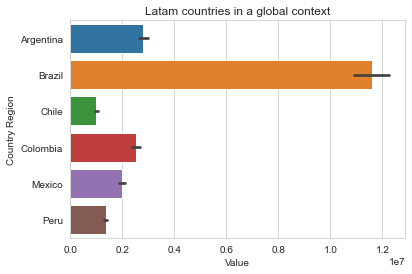

In [11]:
visualize.covid_bar_chart(some_latam_countries_df)